Web Scraping: Using Beautiful Soup and the requests library to fetch HTML content from a website.

Data Processing: Utilizing Pandas to organize and manipulate the extracted data from the website.

Data Visualization: Leveraging Seaborn and Matplotlib to create visualizations that help analyze and understand the scraped data.

In [1]:
from bs4 import BeautifulSoup  
import requests  
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
URL = "https://www.basketball-reference.com/leagues/NBA_2022_totals.html" # selecting the website with table to be analyzed
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser") #using BeautifulSoup to collect content of webside

In [3]:
table = soup.find('table') # selecting only the table content

In [4]:
# selecting the table headers to create the DataFrame

headers = []

for i in table.find_all('th'):
    headers.append(i.text)

headers = headers[1:30]

headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [5]:
# Creating the DataFrame with headers collected from the website

data = pd.DataFrame(columns=headers)
data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [6]:
# collecting stats from the website being scrapped

stats = []

for x in table.find_all('td'):
    stats.append(x.text)

In [7]:
# organizing the stats into their selectd column

Player = stats[::29]
Pos = stats[1::29]
Age = stats[2::29]
Tm = stats[3::29]
G = stats[4::29]
GS = stats[5::29]
MP = stats[6::29]
FG = stats[7::29]
FGA = stats[8::29]
FGper = stats[9::29]
threeP = stats[10::29]
threePA = stats[11::29]
threePper = stats[12::29]
twoP = stats[13::29]
twoPA = stats[14::29]
twoPper = stats[15::29]
eFGper = stats[16::29]
FT = stats[17::29]
FTA = stats[18::29]
FTper = stats[19::29]
ORB = stats[20::29]
DRB = stats[21::29]
TRB = stats[22::29]
AST = stats[23::29]
STL = stats[24::29]
BLK = stats[25::29]
TOV = stats[26::29]
PF = stats[27::29]
PTS = stats[28::29]

In [8]:
# inputting all the stats into the DataFrame to be analyzed, changing some of the names for easy of use

df = pd.DataFrame({'Player' : Player ,'Pos': Pos, 'Age':Age, 'Tm': Tm,'G':G,'GS':GS,'MP':MP,'FG':FG,'FGA':FGA,'FG%':FGper,
          '3P':threeP,'3PA':threePA,'3P%':threePper,'2P':twoP,'2PA':twoPA,'2P%':twoPper,'eFG%':eFGper,'FT':FT,
           'FTA':FTA,'FT%': FTper,'ORB':ORB,'DRB':DRB,'TRB':TRB,'AST':AST,'STL':STL,'BLK':BLK,'TOV':TOV,'PF':PF,'PTS':PTS})

df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,.439,...,.595,146,327,473,82,37,41,84,151,664
1,Steven Adams,C,28,MEM,76,75,1999,210,384,.547,...,.543,349,411,760,256,65,60,115,153,528
2,Bam Adebayo,C,24,MIA,56,56,1825,406,729,.557,...,.753,137,427,564,190,80,44,148,171,1068
3,Santi Aldama,PF,21,MEM,32,0,360,53,132,.402,...,.625,33,54,87,21,6,10,16,36,132
4,LaMarcus Aldridge,C,36,BRK,47,12,1050,252,458,.550,...,.873,73,185,258,42,14,47,44,78,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Thaddeus Young,PF,33,TOR,26,0,475,67,144,.465,...,.481,40,75,115,45,31,11,22,43,164
808,Trae Young,PG,23,ATL,76,76,2652,711,1544,.460,...,.904,50,234,284,737,72,7,303,128,2155
809,Omer Yurtseven,C,23,MIA,56,12,706,130,247,.526,...,.623,85,209,294,49,17,20,41,84,299
810,Cody Zeller,C,29,POR,27,0,355,51,90,.567,...,.776,50,75,125,22,8,6,19,56,140


In [9]:
# saving dataframe into a csv file 

df.to_csv(r'nba.csv', index=False)

In [10]:
# opening the csv file 

nba = pd.read_csv('nba.csv')

In [11]:
# resulting table from the data collected from webscrapping

nba

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,0.439,...,0.595,146,327,473,82,37,41,84,151,664
1,Steven Adams,C,28,MEM,76,75,1999,210,384,0.547,...,0.543,349,411,760,256,65,60,115,153,528
2,Bam Adebayo,C,24,MIA,56,56,1825,406,729,0.557,...,0.753,137,427,564,190,80,44,148,171,1068
3,Santi Aldama,PF,21,MEM,32,0,360,53,132,0.402,...,0.625,33,54,87,21,6,10,16,36,132
4,LaMarcus Aldridge,C,36,BRK,47,12,1050,252,458,0.550,...,0.873,73,185,258,42,14,47,44,78,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Thaddeus Young,PF,33,TOR,26,0,475,67,144,0.465,...,0.481,40,75,115,45,31,11,22,43,164
808,Trae Young,PG,23,ATL,76,76,2652,711,1544,0.460,...,0.904,50,234,284,737,72,7,303,128,2155
809,Omer Yurtseven,C,23,MIA,56,12,706,130,247,0.526,...,0.623,85,209,294,49,17,20,41,84,299
810,Cody Zeller,C,29,POR,27,0,355,51,90,0.567,...,0.776,50,75,125,22,8,6,19,56,140


In [12]:
# observing the quality of data to see missing values

nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  812 non-null    object 
 1   Pos     812 non-null    object 
 2   Age     812 non-null    int64  
 3   Tm      812 non-null    object 
 4   G       812 non-null    int64  
 5   GS      812 non-null    int64  
 6   MP      812 non-null    int64  
 7   FG      812 non-null    int64  
 8   FGA     812 non-null    int64  
 9   FG%     797 non-null    float64
 10  3P      812 non-null    int64  
 11  3PA     812 non-null    int64  
 12  3P%     740 non-null    float64
 13  2P      812 non-null    int64  
 14  2PA     812 non-null    int64  
 15  2P%     784 non-null    float64
 16  eFG%    797 non-null    float64
 17  FT      812 non-null    int64  
 18  FTA     812 non-null    int64  
 19  FT%     715 non-null    float64
 20  ORB     812 non-null    int64  
 21  DRB     812 non-null    int64  
 22  TR

In [13]:
# collecting main stats means from all columns
nba.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,797.000000,812.000000,812.000000,740.000000,...,715.000000,812.000000,812.00000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,26.052956,36.705665,16.672414,825.200739,137.733990,299.630542,0.434257,42.347291,120.043103,0.303445,...,0.747571,35.454433,116.42734,151.881773,84.706897,26.070197,16.077586,44.832512,67.447044,375.464286
std,4.059168,25.898042,23.817195,775.769997,154.739559,330.899684,0.137794,55.200677,148.717408,0.138111,...,0.156305,46.017545,128.74077,168.179066,113.389654,27.231415,21.770808,52.962835,61.619899,426.822290
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,0.000000,121.000000,13.750000,35.000000,0.385000,2.000000,7.000000,0.258750,...,0.673500,4.000000,15.00000,20.750000,7.000000,3.000000,1.000000,5.000000,12.000000,36.500000
50%,25.000000,36.500000,4.000000,577.500000,81.000000,182.500000,0.441000,17.000000,54.000000,0.331000,...,0.765000,20.000000,74.00000,100.000000,41.000000,17.000000,9.000000,28.000000,52.000000,214.000000
75%,29.000000,61.000000,25.000000,1414.500000,216.250000,466.500000,0.500000,63.250000,186.250000,0.376250,...,0.846000,46.000000,176.50000,226.000000,113.250000,42.000000,22.000000,65.000000,110.000000,592.500000
max,41.000000,82.000000,82.000000,2854.000000,774.000000,1564.000000,1.000000,285.000000,750.000000,1.000000,...,1.000000,349.000000,813.00000,1019.000000,737.000000,138.000000,177.000000,303.000000,286.000000,2155.000000


In [34]:
# selecting data for visualization
age_mp = nba[['Age','MP']]  # Selecting 'Age' and 'MP' columns for visualizing age vs minutes played
main = nba[['Pos','FGA','3PA','PTS']]  # Selecting columns related to shooting statistics and player position
age_data = nba[['Age','MP','PTS']]  # Selecting columns related to age, minutes played, and points scored
pos_pts = nba[['Pos','PTS']]  # Selecting columns related to player position and points scored
position_fgp = nba[['Pos','FG%']]  # Selecting columns related to player position and field goal percentage

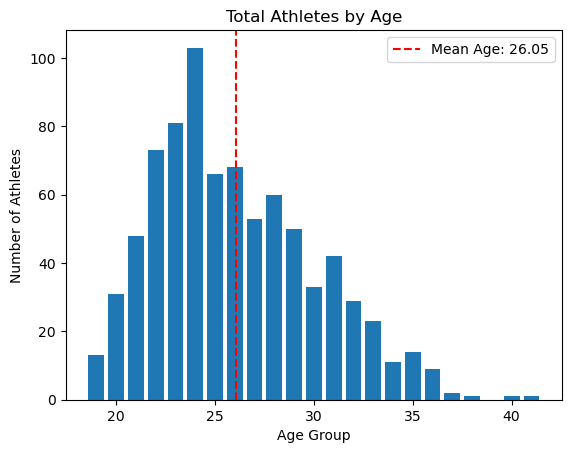

In [38]:
# Plotting the bar graph 1

fig, ax = plt.subplots()

age_counts = age_mp.groupby(['Age']).count()
ax.bar(age_counts.index, age_counts['MP'])

# Adding a red vertical line for the mean age
mean_age = age_mp['Age'].mean()
ax.axvline(x=mean_age, color='red', linestyle='--', label=f'Mean Age: {mean_age:.2f}')

plt.title("Total Athletes by Age")
plt.xlabel('Age Group')
plt.ylabel('Number of Athletes')


# Showing the legend
plt.legend()

# Showing the plot
plt.show()

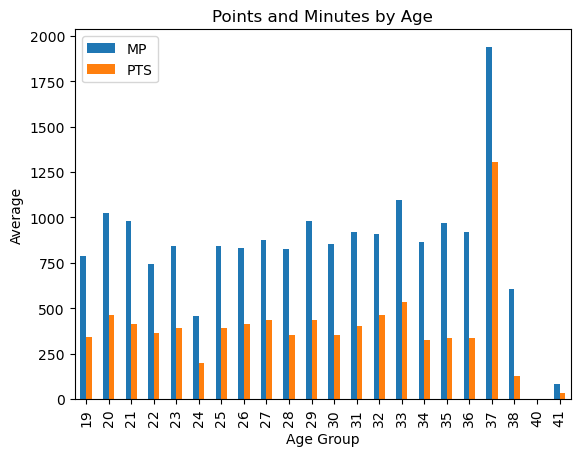

In [44]:
# Plotting the mean points and minutes played by age group
age_data.groupby(['Age']).mean().plot(kind='bar')

# Adding title and axis labels
plt.title("Points and Minutes by Age")
plt.xlabel('Age Group')
plt.ylabel('Average')

# Adding legend to the plot
plt.legend();

In [39]:
# checking for the outliers at 37 years old.
# We can see that both Carmelo Anthony and Lebron James had a lot of minutes played and Lebron James skewed the PTS scored

nba[nba['Age']==37]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
17,Carmelo Anthony,PF,37,LAL,69,3,1793,319,723,0.441,...,0.830,62,226,288,68,47,52,59,166,919
368,LeBron James,C,37,LAL,56,56,2084,640,1221,0.524,...,0.756,63,396,459,349,73,59,196,121,1695


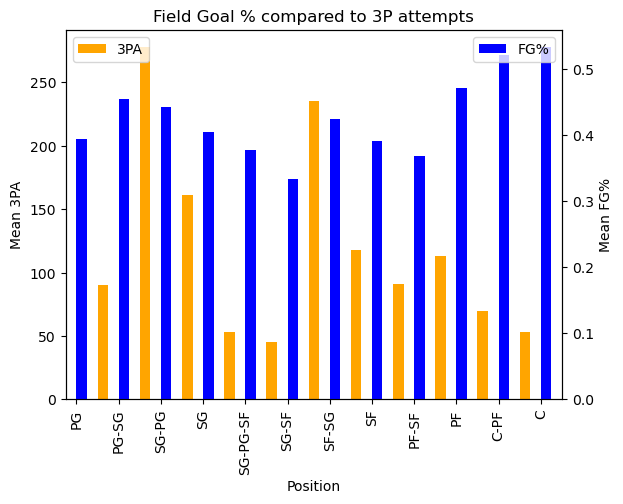

In [40]:
# Define the order you want for the positions
desired_order = ['PG','PG-SG','SG-PG','SG','SG-PG-SF','SG-SF','SF-SG', 'SF','PF-SF', 'PF','C-PF', 'C']

# Plotting the means of FGA and 3PA
fig, ax1 = plt.subplots()

# Plotting the mean 3PA
main.groupby('Pos')['3PA'].mean().reindex(desired_order).plot(kind='bar', color='orange', position=2, width=0.25, ax=ax1, label='3PA')

# Setting the labels for the first y-axis
ax1.set_ylabel('Mean 3PA')

# Creating a secondary y-axis for FG%
ax2 = ax1.twinx()

# Plotting the mean FG%
position_fgp.groupby('Pos')['FG%'].mean().reindex(desired_order).plot(kind='bar', color='blue', position=0, width=0.25, ax=ax2, label='FG%')

# Setting the label for the secondary y-axis
ax2.set_ylabel('Mean FG%')

# Customizing the plot
ax1.set_xlabel('Position')  # Setting label for x-axis
plt.title('Field Goal % compared to 3P attempts')  # Setting title
ax1.legend(loc='upper left')  # Setting legend for ax1
ax2.legend(loc='upper right')  # Setting legend for ax2

# Showing the plot
plt.show()

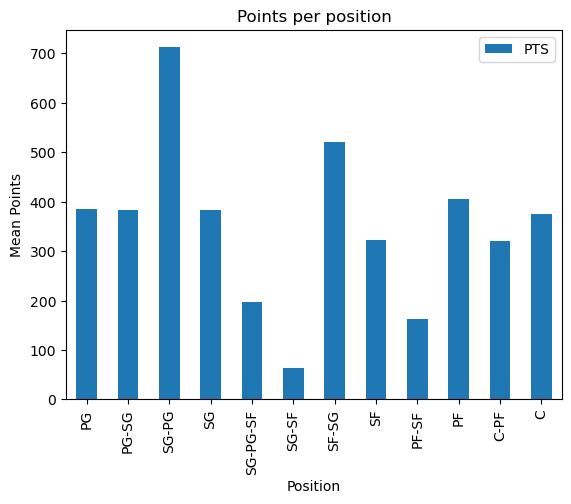

In [41]:
# Define the order you want for the positions
desired_order = ['PG','PG-SG','SG-PG','SG','SG-PG-SF','SG-SF','SF-SG', 'SF','PF-SF', 'PF','C-PF', 'C']

# Reorder the rows of the DataFrame according to the desired order
position_pts_ordered = pos_pts.groupby('Pos').mean().reindex(desired_order)

# Plotting the means of FG%
ax = position_pts_ordered.plot(kind='bar')

# Customizing the plot
ax.set_xlabel('Position')
ax.set_ylabel('Mean Points')
plt.title('Points per position')
plt.show()


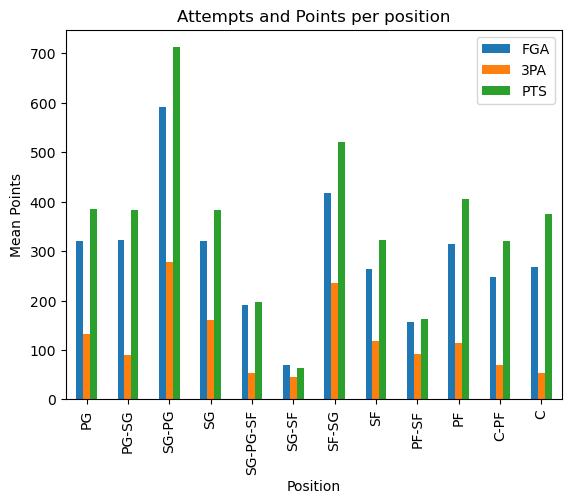

In [42]:
# Define the order you want for the positions
desired_order = ['PG','PG-SG','SG-PG','SG','SG-PG-SF','SG-SF','SF-SG', 'SF','PF-SF', 'PF','C-PF', 'C']

# Reorder the rows of the DataFrame according to the desired order
main_ordered = main.groupby('Pos').mean().reindex(desired_order)

# Plotting the mean points per position
bx = main_ordered.plot(kind='bar')

# Customizing the plot
bx.set_xlabel('Position')
bx.set_ylabel('Mean Points')
plt.title('Attempts and Points per position')

# Showing the plot
plt.show()

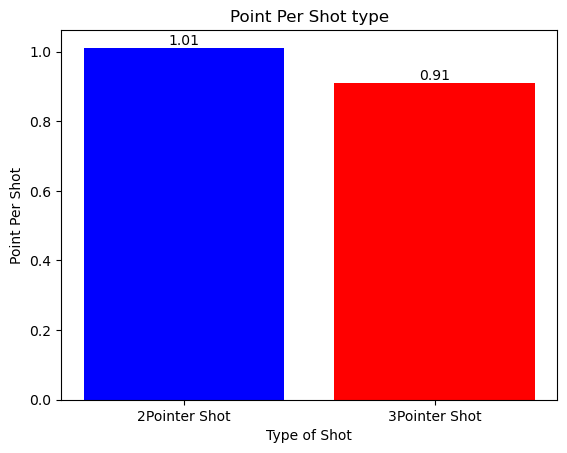

In [43]:
# Calculating the values
twoperthot = nba['2P%'].mean() * 2
threepershot = nba['3P%'].mean() * 3

# Plotting the values
fig, ax = plt.subplots()
ax.bar(['2Pointer Shot', '3Pointer Shot'], [twoperthot, threepershot], color=['blue', 'red'])

# Adding labels and title
ax.set_xlabel('Type of Shot')
ax.set_ylabel('Point Per Shot')
plt.title('Point Per Shot type')

# Adding values within bars
plt.text(0, twoperthot, f'{twoperthot:.2f}', ha='center', va='bottom', color='black')
plt.text(1, threepershot, f'{threepershot:.2f}', ha='center', va='bottom', color='black')


# Showing the plot
plt.show()